# 3 Processing <a id='2_Data_wrangling'></a>

####### We are not doing common pre-processing stuff such as training set testing set division, etc.. as our project mainly deals with computation of values (statistical analysis) and unsupervised exploration using several clustering techniques to understand features, relations, etc. (which will be done in next chapter)

## 3.1 Introduction<a id='2.2_Introduction'></a>

This dataset consist of several CSV files that contain number of geometric features of thousands of channel holes fabricated at nano-meter dimensions on a semconductor substrate. The data has two parts 
1. Original features i.e. the geometric features are measured from image data that are unprocessed, 
2. Enhanced features i.e. geometric features are collected from processed images. 

Each part is subdivided further as 
1. features of a geometric fitted elliptical shape to the channel hole and 
2. features of the original shape.

Each image (of the same region) is acquired three times and the variation in geometric measurements of the same channel hole in three different images provide a measurement precision.
The customer wants to know the best protocol to achive optimal precision. There are four possibilities.
1. Class 1: Original/unprocessed image features and measurements on actual shape of the channel holes
2. Class 2: Original/unprocessed image features and measurements on fitted elliptical shape to the channel holes
3. Class 3: Enhanced/processed image features and measurements on actual shape of the channel holes
4. Class 4: Enhanced/processed image features and measurements on fitted elliptical shape to the channel holes

We have combined features of actual shape and fitted shape with appropriate labels. This results in analysing just two classes of CSV files Original and Enhanced.

In the data-wrangling step we focused on collecting data, organizing it, and making sure it's well defined. Some data cleaning  is also done. In the data exploration step we have looked into various features measured their relationship (or lack of it) with one another and calculated the standard deviation of the features measured in triplicates.

In this third step, we continue to process the data and create measurement precision map i.e. the standard deviation of each feature measured for each channel hole in triplicate. We find out which feature provides best precision and whether that feature can be considered as critical dimension.

## 3.2 Imports<a id='2.3_Imports'></a>

Placing imports together at the start 

In [169]:
#Code task 1#
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import glob
import copy
import string

## 3.3 Load Wrangled Data: <a id='2.5_Load_The_Ski_Resort_Data'></a>

In [170]:
path =r'C:\Users\umesh adiga\Desktop\SpringBoard\capstoneTwo\Proposal01_ExampleData\Metrology\wrangled_data\original\*'
# Get the list of all files in directory tree at given path

fx = []
for file in glob.glob(path):
    fx.append(file)

##### Read CSV files into a panda dataframe

In [171]:
dfx = [] # data frame of frame of frames

for file in fx:
    df = pd.read_csv(file, header=None)
    dfx.append(df)

dfx[0].head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,NaN,file_name,label,location (X_Y),area,area_fitted,perimeter,perimeter_Fitted,areaEnclosingCircle,areaFitEllipse,areaMinAreaRectangle,eccentricity,orientation,convexity,0degDiam,45degDiam,90degDiam,135degDiam
1,322.0,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,323.0,2774_1038,74.00119566057943,82.40424400115718,29.940978318101767,32.81250022503177,80.32151211308145,148.95775377056276,84.55587532680144,0.930036015869853,90.685676574707,0.96961861667744,23.927177016940384,23.74794306882177,24.105076228877603,23.74794306882177
2,323.0,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,324.0,966_1108,75.61169714667143,83.89703680634835,30.107693118898997,32.81250022503177,81.0344795999427,151.9261193943553,85.020898792498,0.917029194698263,78.7483444213867,0.975700934579439,23.567348174964447,23.567348174964447,24.105076228877603,24.105076228877603
3,324.0,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,325.0,128_1112,80.65790864834081,88.92468458801584,31.061576917792518,33.838137462858974,86.34298768075384,162.72058046524324,90.43095382897755,0.921181150203611,84.950309753418,0.977509599561163,23.567348174964447,23.567348174964447,24.105076228877603,23.74794306882177
4,325.0,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,326.0,220_1110,76.40421872188904,84.6335599075658,30.19070518336819,32.81250022503177,81.81897432764279,154.11398193067006,85.020898792498,0.913853326079515,87.97509765625,0.979779411764706,23.927177016940384,23.74794306882177,24.105076228877603,23.927177016940384


In [172]:

for i in range(0, len(dfx)):
    dfx[i] = dfx[i].dropna(axis='columns')
dfx[0].head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,file_name,label,location (X_Y),area,area_fitted,perimeter,perimeter_Fitted,areaEnclosingCircle,areaFitEllipse,areaMinAreaRectangle,eccentricity,orientation,convexity,0degDiam,45degDiam,90degDiam,135degDiam
1,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,323.0,2774_1038,74.00119566057943,82.40424400115718,29.940978318101767,32.81250022503177,80.32151211308145,148.95775377056276,84.55587532680144,0.930036015869853,90.685676574707,0.96961861667744,23.927177016940384,23.74794306882177,24.105076228877603,23.74794306882177
2,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,324.0,966_1108,75.61169714667143,83.89703680634835,30.107693118898997,32.81250022503177,81.0344795999427,151.9261193943553,85.020898792498,0.917029194698263,78.7483444213867,0.975700934579439,23.567348174964447,23.567348174964447,24.105076228877603,24.105076228877603
3,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,325.0,128_1112,80.65790864834081,88.92468458801584,31.061576917792518,33.838137462858974,86.34298768075384,162.72058046524324,90.43095382897755,0.921181150203611,84.950309753418,0.977509599561163,23.567348174964447,23.567348174964447,24.105076228877603,23.74794306882177
4,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,326.0,220_1110,76.40421872188904,84.6335599075658,30.19070518336819,32.81250022503177,81.81897432764279,154.11398193067006,85.020898792498,0.913853326079515,87.97509765625,0.979779411764706,23.927177016940384,23.74794306882177,24.105076228877603,23.927177016940384


In [173]:
## Read header descriptor file
header_descriptor = r'C:\Users\umesh adiga\Desktop\SpringBoard\capstoneTwo\capstone2_data\Metrology\header.csv'
df = pd.read_csv(header_descriptor)
dflx= df.columns.tolist()
dfl=[]

for i in range(0, len(dflx)):
    dfl.append(dflx[i].strip())
    
dfl.insert(1, "label")

for f in range(0, len(dfx)):
        dfx[f].columns=dfl
        dfx[f]=dfx[f].drop(0)

# #remove the labels with '0' label as it indicates triplicate is not fully present
# for f in range(0, len(dfx)):
#         dfx[f]=dfx[f][dfx[f].label != 0]

dfx[0].head()


,file_name,label,location (X_Y),area,area_fitted,perimeter,perimeter_Fitted,areaEnclosingCircle,areaFitEllipse,areaMinAreaRectangle,eccentricity,orientation,convexity,0degDiam,45degDiam,90degDiam,135degDiam
1,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,323.0,2774_1038,74.00119566057943,82.40424400115718,29.940978318101767,32.81250022503177,80.32151211308145,148.95775377056276,84.55587532680144,0.930036015869853,90.685676574707,0.96961861667744,23.927177016940384,23.74794306882177,24.105076228877603,23.74794306882177
2,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,324.0,966_1108,75.61169714667143,83.89703680634835,30.107693118898997,32.81250022503177,81.0344795999427,151.9261193943553,85.020898792498,0.917029194698263,78.7483444213867,0.975700934579439,23.567348174964447,23.567348174964447,24.105076228877603,24.105076228877603
3,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,325.0,128_1112,80.65790864834081,88.92468458801584,31.061576917792518,33.838137462858974,86.34298768075384,162.72058046524324,90.43095382897755,0.921181150203611,84.950309753418,0.977509599561163,23.567348174964447,23.567348174964447,24.105076228877603,23.74794306882177
4,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,326.0,220_1110,76.40421872188904,84.6335599075658,30.19070518336819,32.81250022503177,81.81897432764279,154.11398193067006,85.020898792498,0.913853326079515,87.97509765625,0.979779411764706,23.927177016940384,23.74794306882177,24.105076228877603,23.927177016940384
5,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,327.0,406_1110,75.41831653043079,83.80996149818898,30.225023186582472,33.07189161511812,80.68270277509598,152.11939909623496,86.3502299548336,0.933167384394772,104.24934387207,0.969508400746733,24.105076228877603,23.74794306882177,24.105076228877603,23.567348174964447


In [174]:
#remove the labels with '0' label as it indicates triplicate is not fully present
for f in range(0, len(dfx)):
        dfx[f]=dfx[f][dfx[f].label != "0"]

In [175]:
dfx[0].head()

,file_name,label,location (X_Y),area,area_fitted,perimeter,perimeter_Fitted,areaEnclosingCircle,areaFitEllipse,areaMinAreaRectangle,eccentricity,orientation,convexity,0degDiam,45degDiam,90degDiam,135degDiam
1,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,323.0,2774_1038,74.00119566057943,82.40424400115718,29.940978318101767,32.81250022503177,80.32151211308145,148.95775377056276,84.55587532680144,0.930036015869853,90.685676574707,0.96961861667744,23.927177016940384,23.74794306882177,24.105076228877603,23.74794306882177
2,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,324.0,966_1108,75.61169714667143,83.89703680634835,30.107693118898997,32.81250022503177,81.0344795999427,151.9261193943553,85.020898792498,0.917029194698263,78.7483444213867,0.975700934579439,23.567348174964447,23.567348174964447,24.105076228877603,24.105076228877603
3,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,325.0,128_1112,80.65790864834081,88.92468458801584,31.061576917792518,33.838137462858974,86.34298768075384,162.72058046524324,90.43095382897755,0.921181150203611,84.950309753418,0.977509599561163,23.567348174964447,23.567348174964447,24.105076228877603,23.74794306882177
4,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,326.0,220_1110,76.40421872188904,84.6335599075658,30.19070518336819,32.81250022503177,81.81897432764279,154.11398193067006,85.020898792498,0.913853326079515,87.97509765625,0.979779411764706,23.927177016940384,23.74794306882177,24.105076228877603,23.927177016940384
5,OneDrive_MicronDRAM_Middle_20210121_DMprecisio...,327.0,406_1110,75.41831653043079,83.80996149818898,30.225023186582472,33.07189161511812,80.68270277509598,152.11939909623496,86.3502299548336,0.933167384394772,104.24934387207,0.969508400746733,24.105076228877603,23.74794306882177,24.105076228877603,23.567348174964447


######## convert object to numeric

In [176]:
dfl = (dfx[0].columns)

for f in range(0, len(dfx)):
    for fn in dfl:
        dfx[f][fn] = pd.to_numeric(dfx[f][fn], errors='coerce')

In [177]:
dfx[0].head()

,file_name,label,location (X_Y),area,area_fitted,perimeter,perimeter_Fitted,areaEnclosingCircle,areaFitEllipse,areaMinAreaRectangle,eccentricity,orientation,convexity,0degDiam,45degDiam,90degDiam,135degDiam
1,NaN,323.0,NaN,74.001196,82.404244,29.940978,32.812500,80.321512,148.957754,84.555875,0.930036,90.685677,0.969619,23.927177,23.747943,24.105076,23.747943
2,NaN,324.0,NaN,75.611697,83.897037,30.107693,32.812500,81.034480,151.926119,85.020899,0.917029,78.748344,0.975701,23.567348,23.567348,24.105076,24.105076
3,NaN,325.0,NaN,80.657909,88.924685,31.061577,33.838137,86.342988,162.720580,90.430954,0.921181,84.950310,0.977510,23.567348,23.567348,24.105076,23.747943
4,NaN,326.0,NaN,76.404219,84.633560,30.190705,32.812500,81.818974,154.113982,85.020899,0.913853,87.975098,0.979779,23.927177,23.747943,24.105076,23.927177
5,NaN,327.0,NaN,75.418317,83.809961,30.225023,33.071892,80.682703,152.119399,86.350230,0.933167,104.249344,0.969508,24.105076,23.747943,24.105076,23.567348


In [178]:
for f in range(0, len(dfx)):
        dfx[f]=dfx[f].dropna(axis=1)

dfx[0].head()

,label,area,area_fitted,perimeter,perimeter_Fitted,areaEnclosingCircle,areaFitEllipse,areaMinAreaRectangle,eccentricity,orientation,convexity,0degDiam,45degDiam,90degDiam,135degDiam
1,323.0,74.001196,82.404244,29.940978,32.812500,80.321512,148.957754,84.555875,0.930036,90.685677,0.969619,23.927177,23.747943,24.105076,23.747943
2,324.0,75.611697,83.897037,30.107693,32.812500,81.034480,151.926119,85.020899,0.917029,78.748344,0.975701,23.567348,23.567348,24.105076,24.105076
3,325.0,80.657909,88.924685,31.061577,33.838137,86.342988,162.720580,90.430954,0.921181,84.950310,0.977510,23.567348,23.567348,24.105076,23.747943
4,326.0,76.404219,84.633560,30.190705,32.812500,81.818974,154.113982,85.020899,0.913853,87.975098,0.979779,23.927177,23.747943,24.105076,23.927177
5,327.0,75.418317,83.809961,30.225023,33.071892,80.682703,152.119399,86.350230,0.933167,104.249344,0.969508,24.105076,23.747943,24.105076,23.567348


In [179]:
dfx[1].head()

,label,area,area_fitted,perimeter,perimeter_Fitted,areaEnclosingCircle,areaFitEllipse,areaMinAreaRectangle,eccentricity,orientation,convexity,0degDiam,45degDiam,90degDiam,135degDiam
1,324.0,75.030060,83.329421,30.156348,32.551042,80.590521,152.198505,83.722794,0.937859,74.027878,0.969811,23.927177,23.385359,24.105076,23.747943
2,325.0,80.635274,89.006756,31.255494,34.089726,87.538779,163.493037,91.713727,0.944779,75.765022,0.968988,24.105076,24.105076,24.105076,23.747943
3,326.0,76.475859,84.805930,30.390180,33.071892,81.315237,154.231681,85.808339,0.929383,82.846664,0.971498,24.456993,23.747943,24.105076,23.385359
4,327.0,74.810780,83.241752,30.142106,33.071892,81.326090,150.133665,85.020899,0.901601,100.081467,0.968414,24.281672,23.747943,24.105076,23.567348
5,328.0,74.761964,83.110075,30.024451,32.812500,80.522921,150.401775,84.934981,0.905185,95.048309,0.968987,23.927177,23.747943,24.105076,23.567348


In [180]:
dfx[2].head()

,label,area,area_fitted,perimeter,perimeter_Fitted,areaEnclosingCircle,areaFitEllipse,areaMinAreaRectangle,eccentricity,orientation,convexity,0degDiam,45degDiam,90degDiam,135degDiam
1,324,74.272038,82.581267,29.906334,32.551042,80.763977,149.222382,83.591874,0.889549,77.532021,0.972329,23.927177,23.567348,24.105076,23.567348
2,325,80.249512,88.595637,31.014342,34.089726,86.347817,162.019766,91.693814,0.899179,81.122856,0.972973,24.281672,24.456993,24.105076,23.927177
3,326,75.515069,83.940541,30.390180,33.071892,81.081658,152.240837,85.020899,0.915795,89.837952,0.963603,24.281672,23.747943,24.105076,23.385359
4,327,74.957038,83.197883,29.906334,32.551042,80.821949,151.556197,83.591874,0.918368,87.587372,0.977764,24.281672,23.927177,24.105076,23.385359
5,328,75.054385,83.373221,30.024451,32.812500,81.117397,152.631516,85.020899,0.935619,94.915878,0.975348,24.281672,24.105076,24.105076,23.567348


#### Calculate the standard deviation of the triplicate measurements

In [181]:
print(len(dfx))

33


In [182]:
mean=[]
std=[]

#short method to return mean and standard deviation
def getStat(i1, i2, i3):
    arr = np.array([i1, i2, i3])

    if(i2!=-1 and i3==-1):
        arr = np.array([i1, i2])
    elif(i2==-1 and i3!=-1):
        arr=np.array([i1, i3])
    elif(i2==-1 and i3==-1):
        arr=np.array([i1])

    m = np.mean(arr)
    s = np.std(arr)
    return m, s


for k in range(0, len(dfx), 3):
    print(k, len(dfx))
    mn = pd.DataFrame(index=range(dfx[k].shape[0]),columns=range(dfx[k].shape[1]))
    sd = pd.DataFrame(index=range(dfx[k].shape[0]),columns=range(dfx[k].shape[1]))
    mn = pd.DataFrame(data=mn.values, columns=dfx[k].columns)
    sd = pd.DataFrame(data=sd.values, columns=dfx[k].columns)
    ######### read the triplets with first df as primary and calculate standard deviation
    for k1 in range(0, len(dfx[k])):
        for ft in dfx[k].columns:
            if ft == "label":
                mn.at[k1, ft]=dfx[k+0].iloc[k1][ft]
                sd.at[k1, ft]=dfx[k+0].iloc[k1][ft]
                continue
            m=-1
            s=-1
            if(k1<len(dfx[k+1])) and (k1<len(dfx[k+2])):
                m, s = getStat(dfx[k+0].iloc[k1][ft], dfx[k+1].iloc[k1][ft], dfx[k+2].iloc[k1][ft])
            elif(k1 < len(dfx[k+1])) and (k1 >= len(dfx[k+2])):
                m, s = getStat(dfx[k+0].iloc[k1][ft], dfx[k+1].iloc[k1][ft], -1)
            elif(k1 >= len(dfx[k+1])) and (k1 < len(dfx[k+2])):
                m, s = getStat(dfx[k+0].iloc[k1][ft], -1, dfx[k+2].iloc[k1][ft])
            elif(k1 >= len(dfx[k+1])) and (k1 >= len(dfx[k+2])):
                m, s = getStat(dfx[k+0].iloc[k1][ft], -1, -1)
                    
            mn.at[k1, ft]=m
            sd.at[k1, ft]=s
    #########
    mean.append(mn)
    std.append(sd)


0 33
3 33
6 33
9 33
12 33
15 33
18 33
21 33
24 33
27 33
30 33


In [183]:
mean[0].head()

,label,area,area_fitted,perimeter,perimeter_Fitted,areaEnclosingCircle,areaFitEllipse,areaMinAreaRectangle,eccentricity,orientation,convexity,0degDiam,45degDiam,90degDiam,135degDiam
0,323.0,74.434431,82.771644,30.00122,32.638195,80.55867,150.126214,83.956848,0.919148,80.748525,0.970586,23.927177,23.566883,24.105076,23.687745
1,324.0,78.832161,87.166477,30.79251,33.663984,84.973692,159.146308,89.476146,0.920329,78.545408,0.972554,23.984699,24.043139,24.105076,23.926732
2,325.0,77.549612,85.890385,30.613979,33.327307,82.913294,156.3977,87.086731,0.92212,85.878309,0.97087,24.102004,23.687745,24.105076,23.50622
3,326.0,75.390679,83.691065,30.079715,32.811811,81.322338,151.934615,84.544557,0.911274,91.881312,0.975319,24.163507,23.807688,24.105076,23.626628
4,327.0,75.078222,83.431086,30.091309,32.898964,80.77434,151.717563,85.43537,0.924657,98.071177,0.971281,24.104642,23.866987,24.105076,23.567348


In [184]:
std[0].head(10)

,label,area,area_fitted,perimeter,perimeter_Fitted,areaEnclosingCircle,areaFitEllipse,areaMinAreaRectangle,eccentricity,orientation,convexity,0degDiam,45degDiam,90degDiam,135degDiam
0,323.0,0.435446,0.400974,0.1106,0.123253,0.182034,1.469309,0.426935,0.021172,7.170774,0.001235,0.0,0.148025,0.0,0.085133
1,324.0,2.282651,2.317928,0.494145,0.60209,2.82756,5.14075,3.150346,0.018762,2.192029,0.002756,0.30379,0.365827,0.0,0.145799
2,325.0,2.232623,2.174466,0.3165,0.361212,2.427033,4.544226,2.386474,0.005587,2.928641,0.005695,0.384775,0.085133,0.0,0.170924
3,326.0,0.719164,0.666685,0.124194,0.212637,0.407043,1.646841,0.673649,0.007084,5.800545,0.004951,0.167111,0.084492,0.0,0.225133
4,327.0,0.268484,0.288642,0.09455,0.122278,0.251195,0.953604,0.647854,0.013805,4.368958,0.002883,0.144722,0.168354,0.0,0.0
5,328.0,0.895994,0.965518,0.348493,0.318386,1.055186,1.249431,1.695062,0.004764,2.76834,0.004619,0.289471,0.223435,0.0,0.145799
6,329.0,0.510611,0.546129,0.117987,0.321198,0.741992,0.798639,1.589543,0.003697,14.33505,0.003437,0.22201,0.085133,0.0,0.386833
7,330.0,1.44863,1.466953,0.313335,0.355819,1.850173,2.897223,1.853602,0.009733,6.872695,0.001352,0.145799,0.084492,0.0,0.384775
8,331.0,2.309301,2.291343,0.454545,0.415533,2.351439,4.548966,2.207387,0.016609,15.628603,0.002433,0.0,0.223435,0.0,0.083862
9,332.0,0.738848,0.79859,0.304688,0.245531,0.433352,1.130308,1.274445,0.016742,11.673448,0.003116,0.144722,0.084492,0.0,0.306088


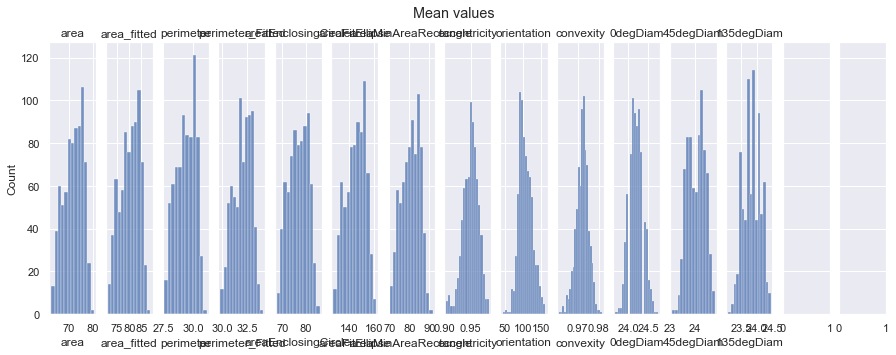

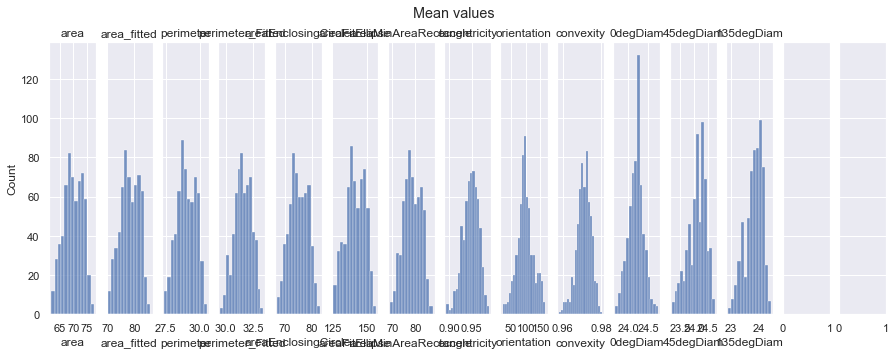

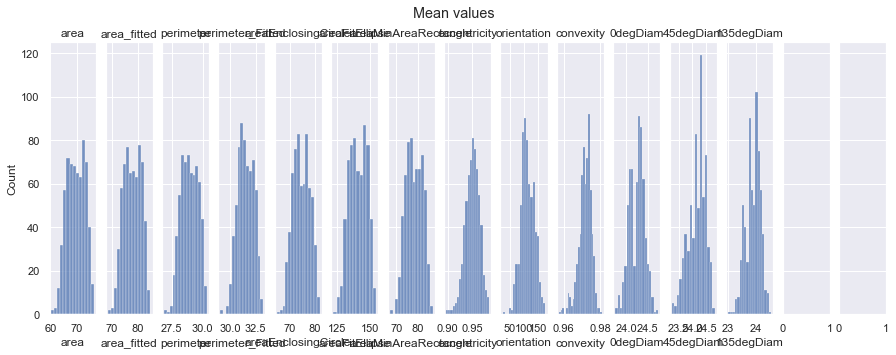

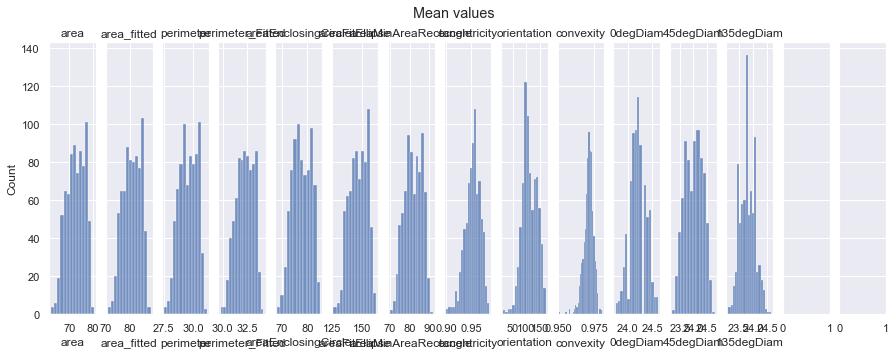

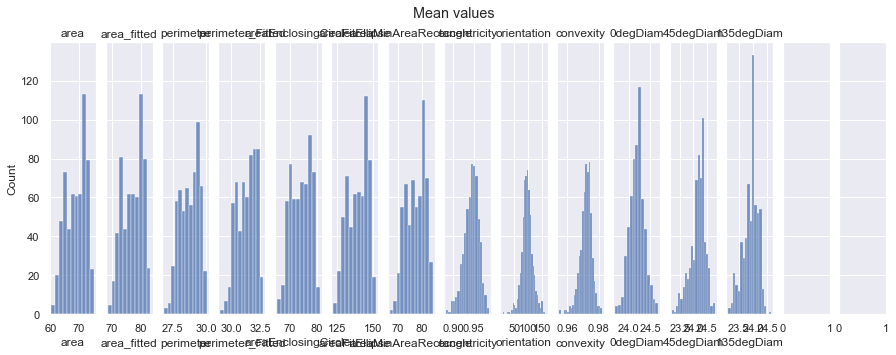

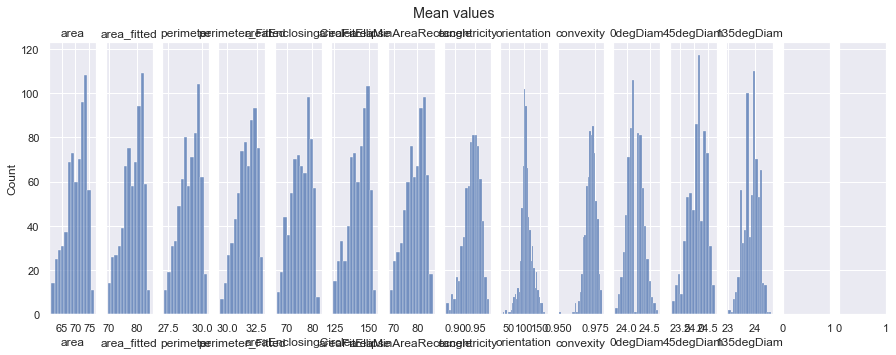

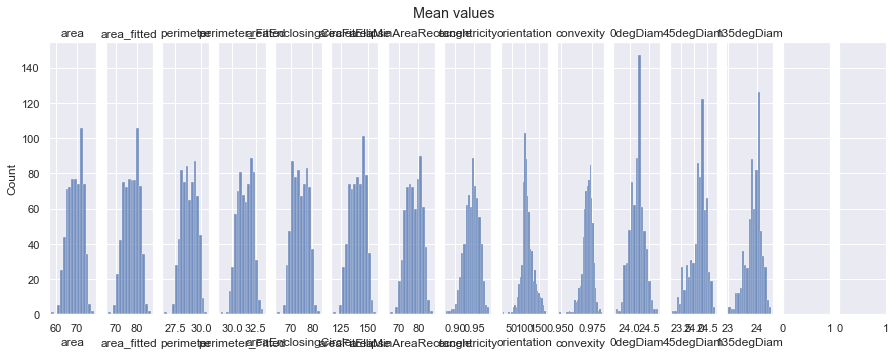

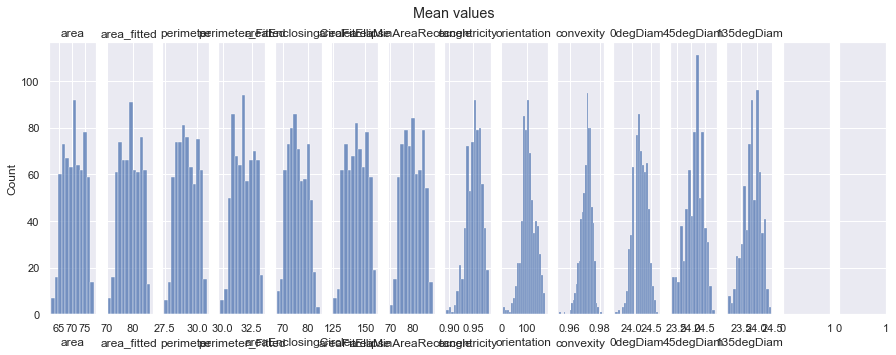

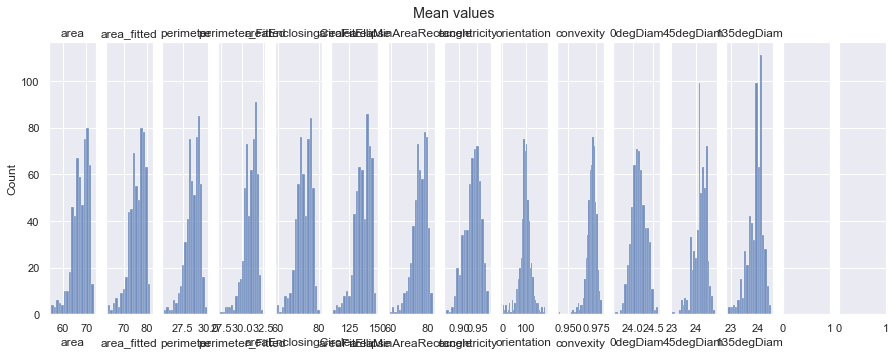

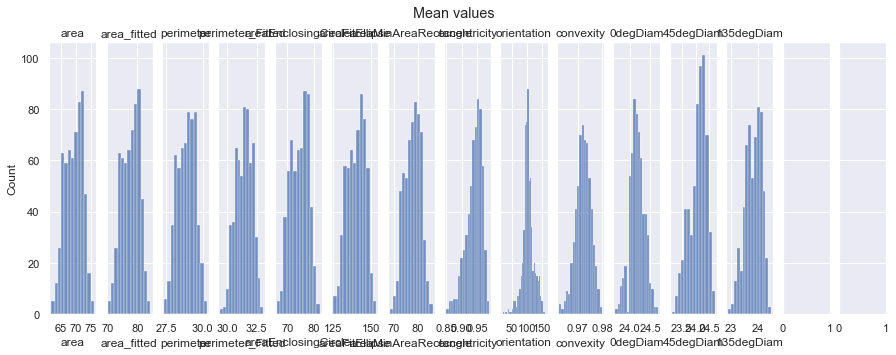

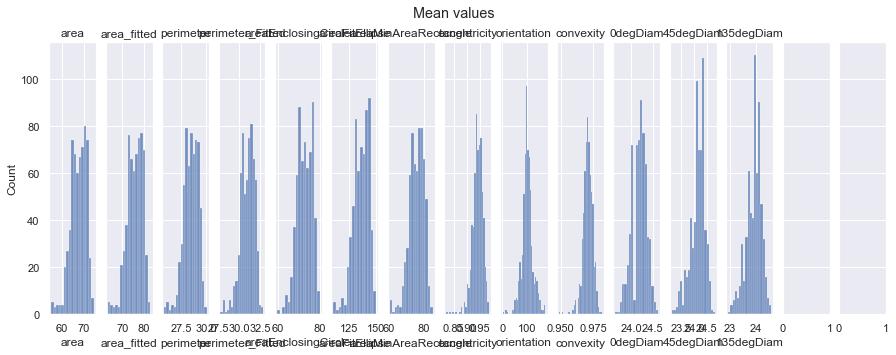

In [185]:
# for ft in mean[0].columns:
#     if ft == "label":
#         continue
#     sns.displot(mean[0][ft])
#     sns.displot(std[0][ft]);
for k in range(0,len(mean)):
    fig, axes = plt.subplots(1, len(mean[k].columns), figsize=(15, 5), sharey=True)
    fig.suptitle('Mean values')
    count=0
    for ft in mean[k].columns:
        if ft == "label" or ft == "90degDiam":
            continue
        sns.histplot(mean[k][ft], ax=axes[count])
        axes[count].set_title(ft)
        count=count+1


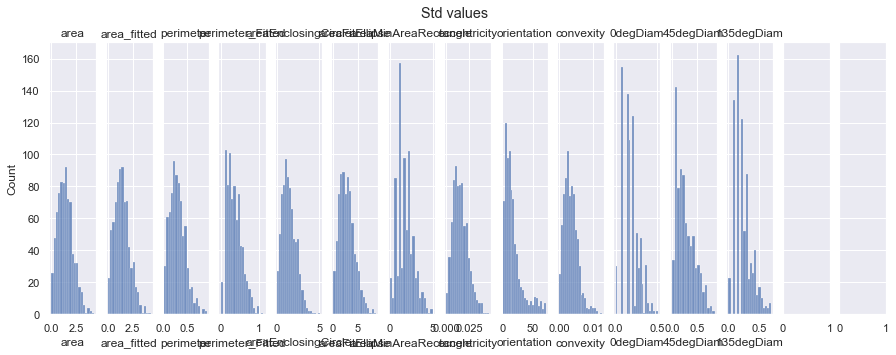

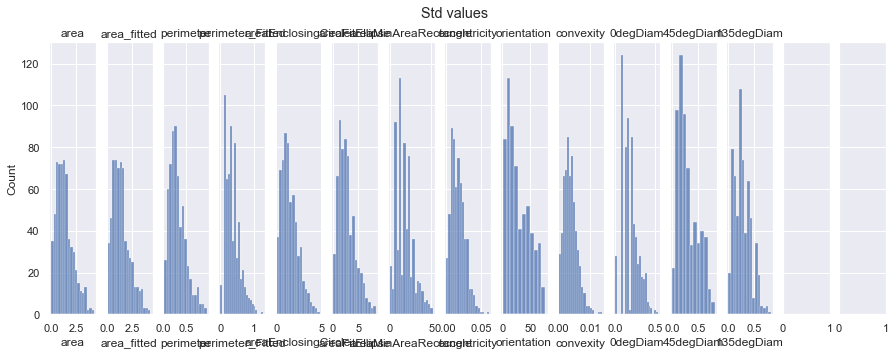

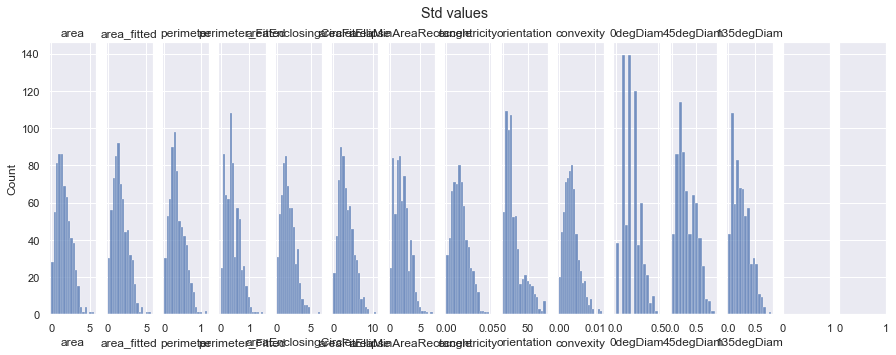

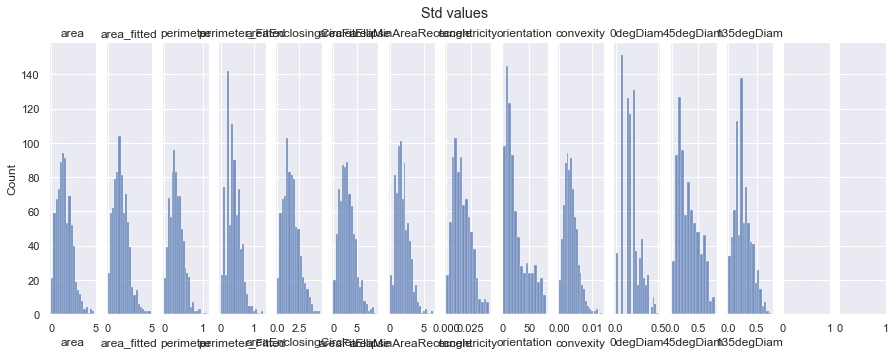

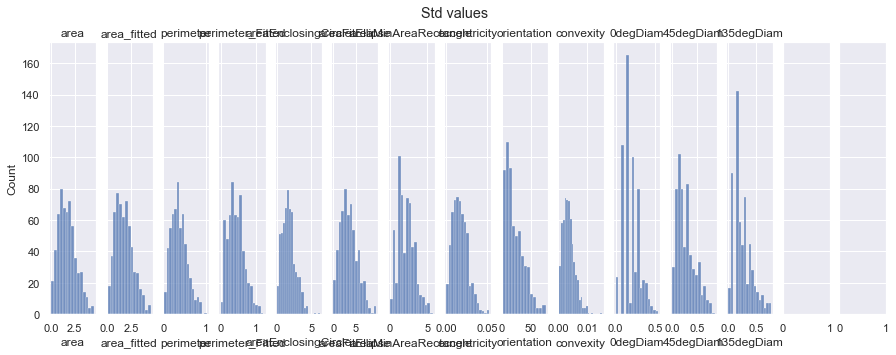

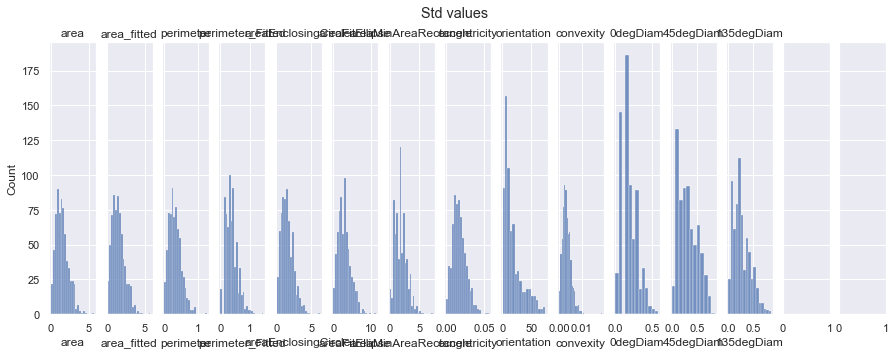

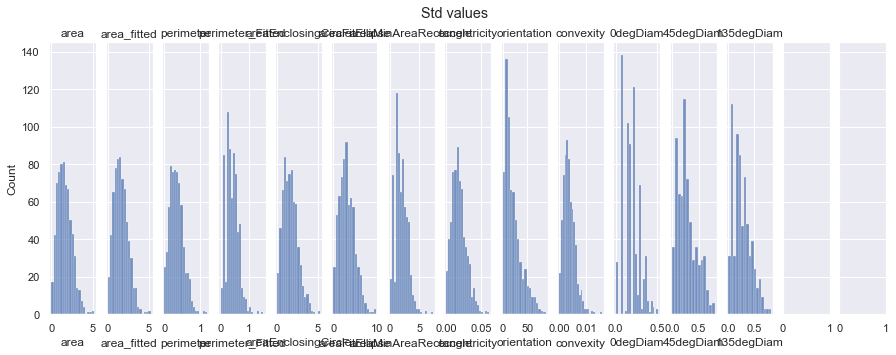

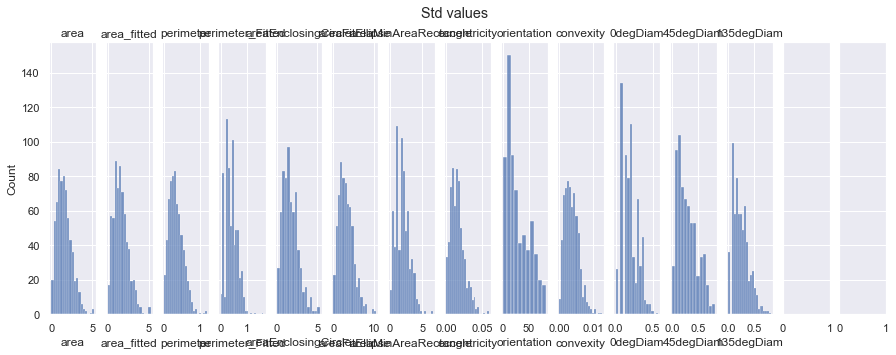

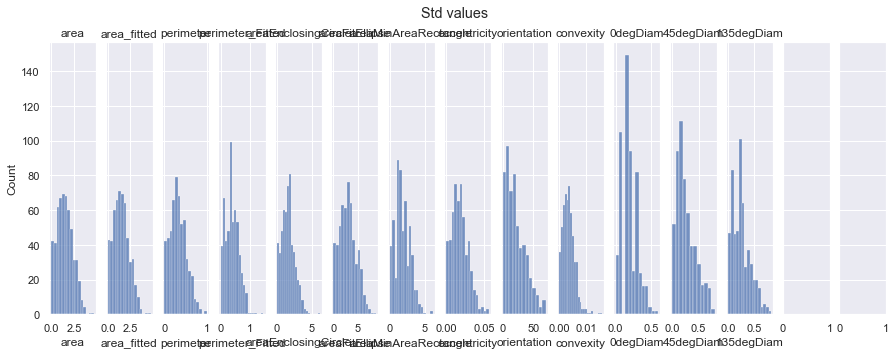

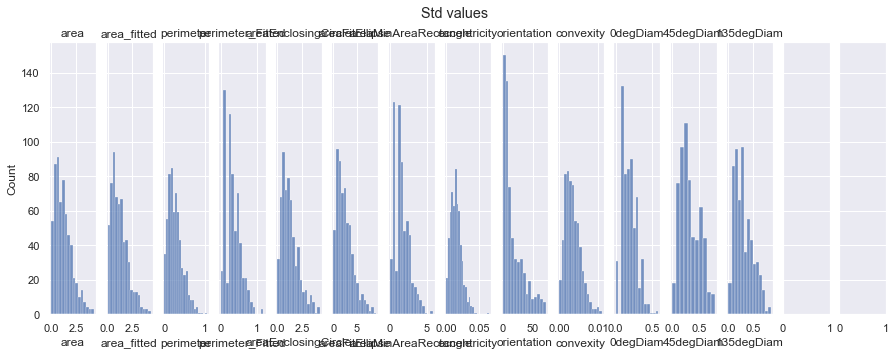

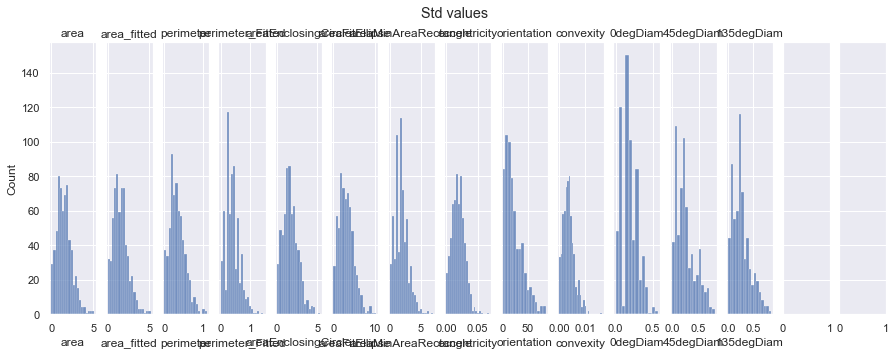

In [186]:
for k in range(0,len(std)):
    fig, axes = plt.subplots(1, len(std[k].columns), figsize=(15, 5), sharey=True)
    fig.suptitle('Std values')
    count=0
    for ft in mean[k].columns:
        if ft == "label" or ft == "90degDiam":
            continue
        sns.histplot(std[k][ft], ax=axes[count])
        axes[count].set_title(ft)
        count=count+1

<AxesSubplot:>

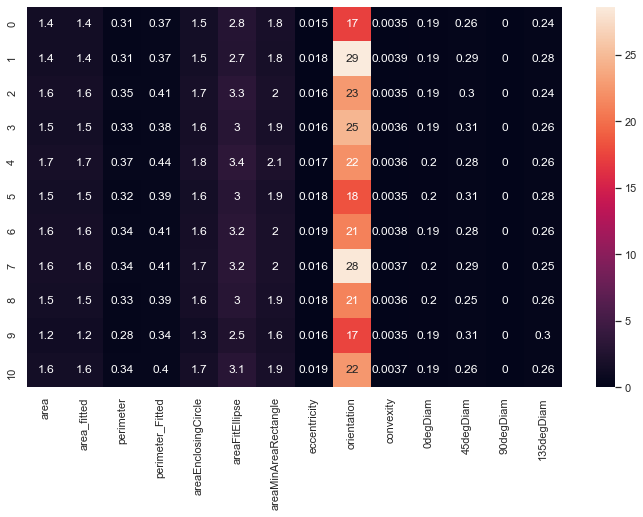

In [187]:
#Find average of each standard deviation column and display
avg_std=[]
ftx=[]
for ft in std[k].columns:
    if ft == "label":
        continue
    ftx.append(ft)
    
for k in range(0,len(std)):
    avg=[]
    for ft in std[k].columns:
        if ft == "label":
            continue
        mn = std[k][ft].mean()
        avg.append(mn)
    avg_std.append(avg)
    
df = pd.DataFrame(avg_std)
df.columns = ftx
fig, ax = plt.subplots(figsize = (12, 7)) 
sns.heatmap(df, annot = True)

In [188]:
'''Check if directory exists, if not, create it'''
# You should change 'test' to your preferred folder.
MYDIR = "C:\\Users\\umesh adiga\\Desktop\\SpringBoard\\capstoneTwo\\Proposal01_ExampleData\\Metrology\\preprocessed_data\\original"
CHECK_FOLDER = os.path.isdir(MYDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MYDIR)
    print("created folder : ", MYDIR)
else:
    print(MYDIR, "folder already exists.")
    
for f in range(0, len(mean)):       
        name = "\\mean_0"+ str(f)+".csv"
        if(f>9):
            name = "\\mean_" + str(f) + ".csv"
        mean[f].to_csv(MYDIR+name)
for f in range(0, len(std)):       
        name = "\\std_0"+ str(f)+".csv"
        if(f>9):
            name = "\\std_" + str(f) + ".csv"
        std[f].to_csv(MYDIR+name)

C:\Users\umesh adiga\Desktop\SpringBoard\capstoneTwo\Proposal01_ExampleData\Metrology\preprocessed_data\original folder already exists.


In [189]:
## Do the same set of calculations for enhanced data class

path =r'C:\Users\umesh adiga\Desktop\SpringBoard\capstoneTwo\Proposal01_ExampleData\Metrology\wrangled_data\enhanced\*'
# Get the list of all files in directory tree at given path

fx = []
for file in glob.glob(path):
    fx.append(file)
    
dfx = [] # data frame of frame of frames
for file in fx:
    df = pd.read_csv(file, header=None)
    dfx.append(df)

for i in range(0, len(dfx)):
    dfx[i] = dfx[i].dropna(axis='columns')
    
## Read header descriptor file
header_descriptor = r'C:\Users\umesh adiga\Desktop\SpringBoard\capstoneTwo\capstone2_data\Metrology\header.csv'
df = pd.read_csv(header_descriptor)
dflx= df.columns.tolist()
dfl=[]

for i in range(0, len(dflx)):
    dfl.append(dflx[i].strip())
    
dfl.insert(1, "label")

for f in range(0, len(dfx)):
        dfx[f].columns=dfl
        dfx[f]=dfx[f].drop(0)
    
#remove the labels with '0' label as it indicates triplicate is not fully present
for f in range(0, len(dfx)):
        dfx[f]=dfx[f][dfx[f].label != "0"]

dfl = (dfx[0].columns)
for f in range(0, len(dfx)):
    for fn in dfl:
        dfx[f][fn] = pd.to_numeric(dfx[f][fn], errors='coerce')
        
for f in range(0, len(dfx)):
        dfx[f]=dfx[f].dropna(axis=1)

mean=[]
std=[]

#short method to return mean and standard deviation
def getStat(i1, i2, i3):
    arr = np.array([i1, i2, i3])

    if(i2!=-1 and i3==-1):
        arr = np.array([i1, i2])
    elif(i2==-1 and i3!=-1):
        arr=np.array([i1, i3])
    elif(i2==-1 and i3==-1):
        arr=np.array([i1])

    m = np.mean(arr)
    s = np.std(arr)
    return m, s


for k in range(0, len(dfx), 3):
    print(k, len(dfx))
    mn = pd.DataFrame(index=range(dfx[k].shape[0]),columns=range(dfx[k].shape[1]))
    sd = pd.DataFrame(index=range(dfx[k].shape[0]),columns=range(dfx[k].shape[1]))
    mn = pd.DataFrame(data=mn.values, columns=dfx[k].columns)
    sd = pd.DataFrame(data=sd.values, columns=dfx[k].columns)
    ######### read the triplets with first df as primary and calculate standard deviation
    for k1 in range(0, len(dfx[k])):
        for ft in dfx[k].columns:
            if ft == "label":
                mn.at[k1, ft]=dfx[k+0].iloc[k1][ft]
                sd.at[k1, ft]=dfx[k+0].iloc[k1][ft]
                continue
            m=-1
            s=-1
            if(k1<len(dfx[k+1])) and (k1<len(dfx[k+2])):
                m, s = getStat(dfx[k+0].iloc[k1][ft], dfx[k+1].iloc[k1][ft], dfx[k+2].iloc[k1][ft])
            elif(k1 < len(dfx[k+1])) and (k1 >= len(dfx[k+2])):
                m, s = getStat(dfx[k+0].iloc[k1][ft], dfx[k+1].iloc[k1][ft], -1)
            elif(k1 >= len(dfx[k+1])) and (k1 < len(dfx[k+2])):
                m, s = getStat(dfx[k+0].iloc[k1][ft], -1, dfx[k+2].iloc[k1][ft])
            elif(k1 >= len(dfx[k+1])) and (k1 >= len(dfx[k+2])):
                m, s = getStat(dfx[k+0].iloc[k1][ft], -1, -1)
                    
            mn.at[k1, ft]=m
            sd.at[k1, ft]=s
    #########
    mean.append(mn)
    std.append(sd)

0 33
3 33
6 33
9 33
12 33
15 33
18 33
21 33
24 33
27 33
30 33


In [190]:
mean[0].head()

,label,area,area_fitted,perimeter,perimeter_Fitted,areaEnclosingCircle,areaFitEllipse,areaMinAreaRectangle,eccentricity,orientation,convexity,0degDiam,45degDiam,90degDiam,135degDiam
0,335.0,77.854059,86.297976,30.919905,33.582751,86.864756,157.546572,87.486483,0.859861,83.037427,0.965749,23.201455,22.949833,23.385359,22.64119
1,336.0,79.137365,87.555177,31.141908,33.837509,87.315217,159.810512,88.86937,0.849336,82.754356,0.967741,23.201455,23.139329,23.385359,23.078689
2,337.0,79.975769,88.306303,31.184053,33.753018,87.205685,163.005751,89.25656,0.900267,83.498192,0.965669,23.444118,23.140316,23.385359,23.200492
3,338.0,78.666131,87.038342,30.947008,33.584022,86.057539,158.84395,88.549674,0.869805,91.097788,0.969177,23.262594,23.200468,23.385359,23.015577
4,339.0,78.630417,87.006128,30.931073,33.668513,85.774523,158.554429,88.88283,0.871953,90.162348,0.969247,23.199992,23.199992,23.385359,23.009068


In [191]:
std[0].head()

,label,area,area_fitted,perimeter,perimeter_Fitted,areaEnclosingCircle,areaFitEllipse,areaMinAreaRectangle,eccentricity,orientation,convexity,0degDiam,45degDiam,90degDiam,135degDiam
0,335.0,0.514785,0.509886,0.183627,0.358485,1.089931,0.49411,1.113527,0.01454,7.836875,0.008336,0.150356,0.491963,0.0,0.267987
1,336.0,0.898294,0.859502,0.092799,0.206191,0.369862,1.399306,1.203075,0.007661,5.173528,0.00657,0.150356,0.230732,0.0,0.087153
2,337.0,0.226044,0.270047,0.166745,0.238088,0.20938,0.806725,0.353275,0.013237,3.611773,0.004045,0.310844,0.087153,0.0,0.259407
3,338.0,0.967863,0.960245,0.159416,0.207747,1.625681,1.45926,1.652189,0.008136,4.220548,0.001791,0.173616,0.261475,0.0,0.261475
4,339.0,1.298716,1.28881,0.184561,0.239885,0.565818,2.82198,1.980273,0.04203,9.133785,0.002104,0.300744,0.300744,0.0,0.606579


In [192]:
'''Check if directory exists, if not, create it'''
# You should change 'test' to your preferred folder.
MYDIR = "C:\\Users\\umesh adiga\\Desktop\\SpringBoard\\capstoneTwo\\Proposal01_ExampleData\\Metrology\\preprocessed_data\\enhanced"
CHECK_FOLDER = os.path.isdir(MYDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MYDIR)
    print("created folder : ", MYDIR)
else:
    print(MYDIR, "folder already exists.")
    
for f in range(0, len(mean)):       
        name = "\\mean_0"+ str(f)+".csv"
        if(f>9):
            name = "\\mean_" + str(f) + ".csv"
        mean[f].to_csv(MYDIR+name)
for f in range(0, len(std)):       
        name = "\\std_0"+ str(f)+".csv"
        if(f>9):
            name = "\\std_" + str(f) + ".csv"
        std[f].to_csv(MYDIR+name)

C:\Users\umesh adiga\Desktop\SpringBoard\capstoneTwo\Proposal01_ExampleData\Metrology\preprocessed_data\enhanced folder already exists.


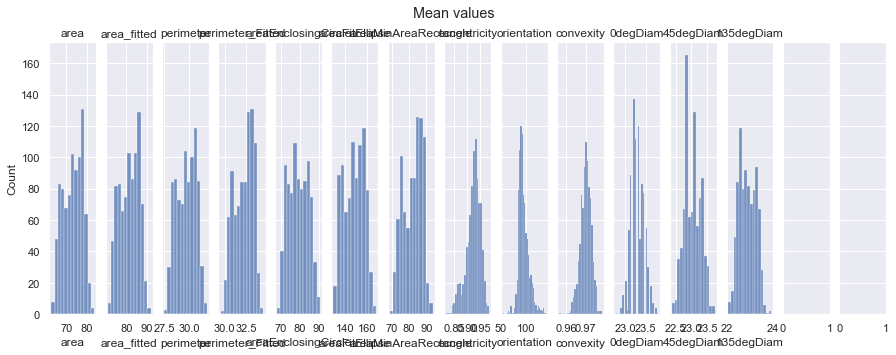

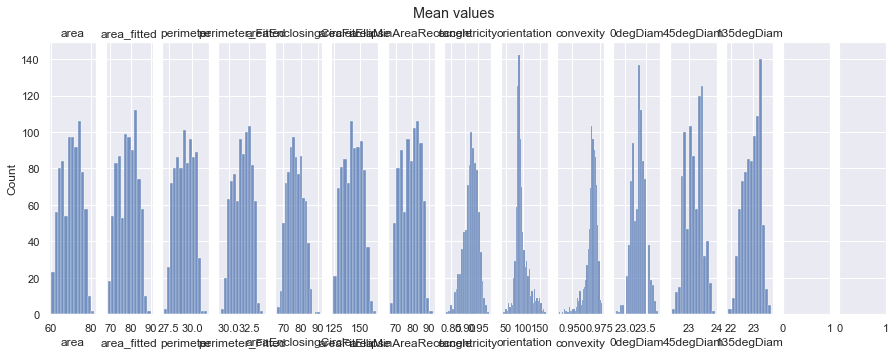

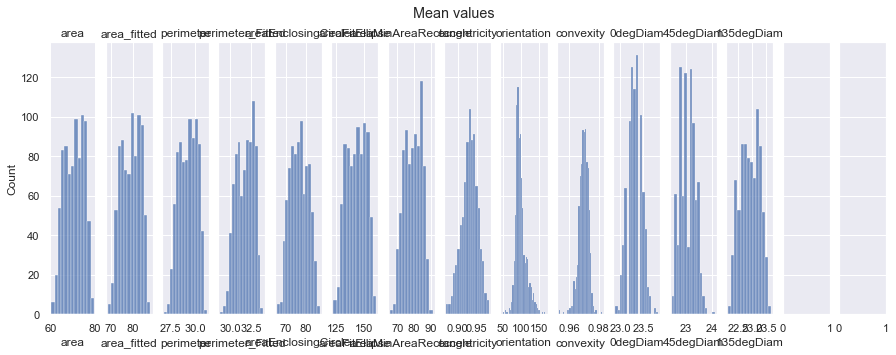

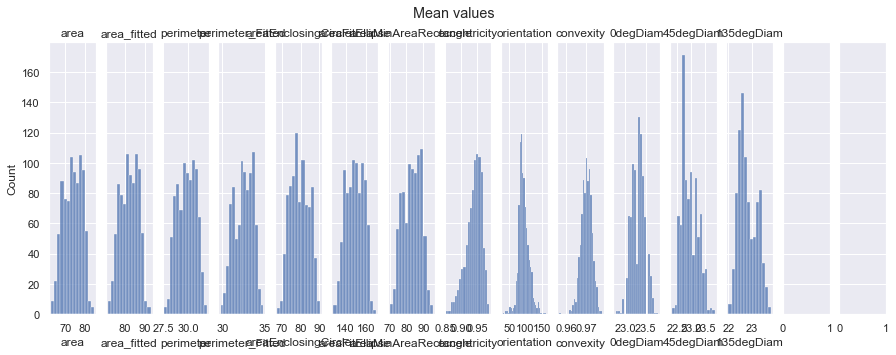

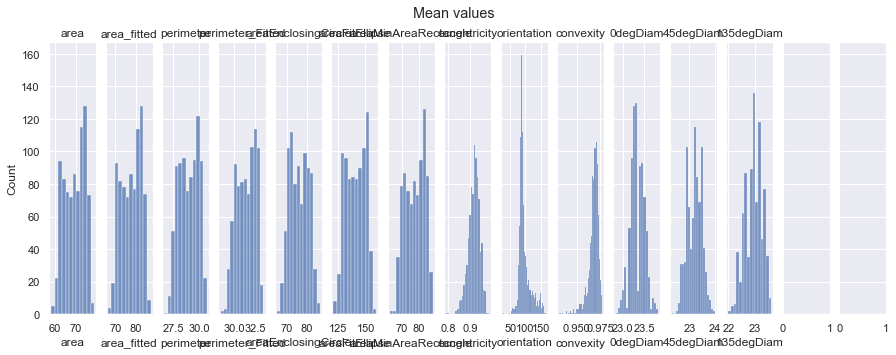

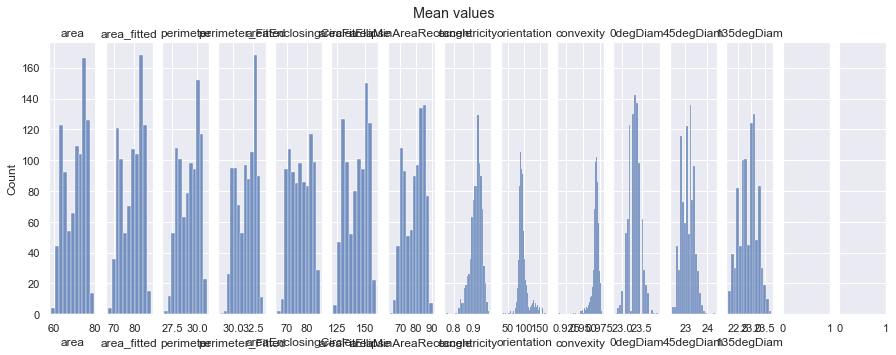

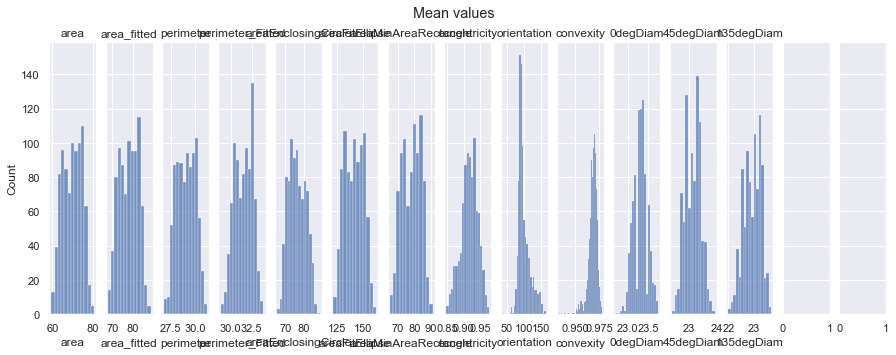

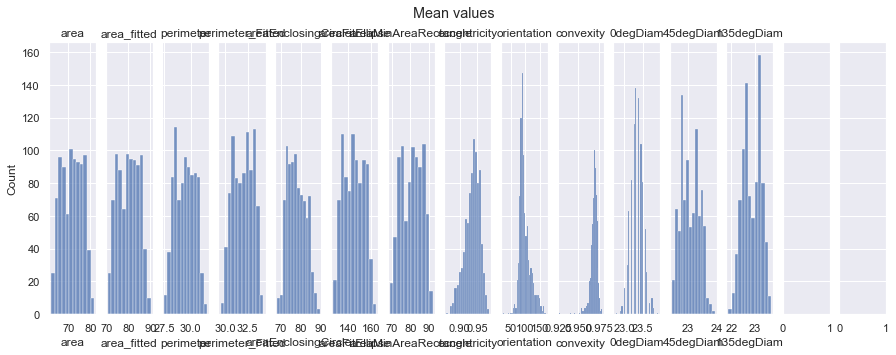

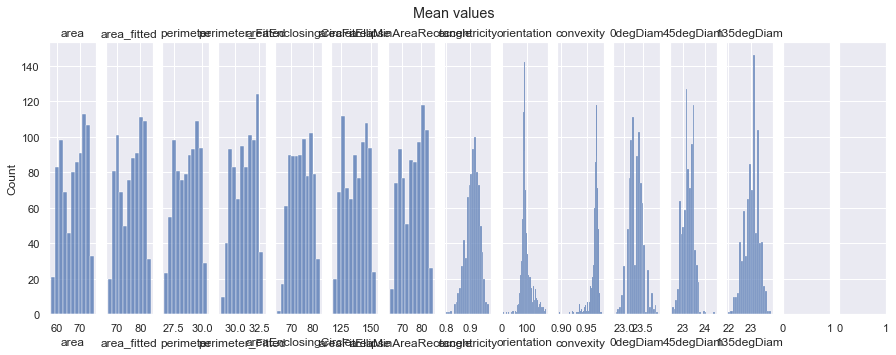

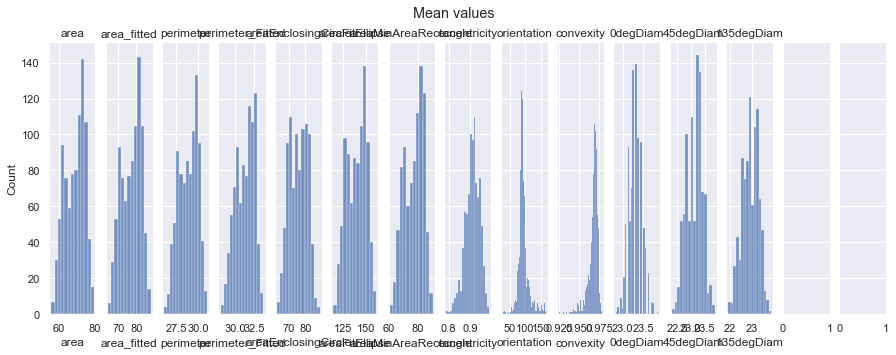

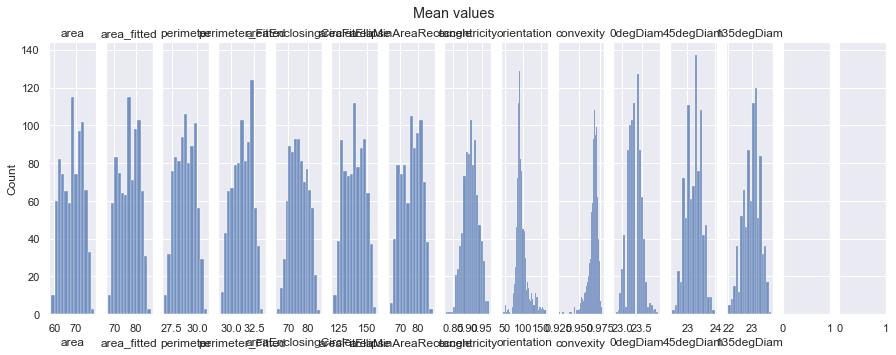

In [193]:
for k in range(0,len(mean)):
    fig, axes = plt.subplots(1, len(mean[k].columns), figsize=(15, 5), sharey=True)
    fig.suptitle('Mean values')
    count=0
    for ft in mean[k].columns:
        if ft == "label" or ft == "90degDiam":
            continue
        sns.histplot(mean[k][ft], ax=axes[count])
        axes[count].set_title(ft)
        count=count+1

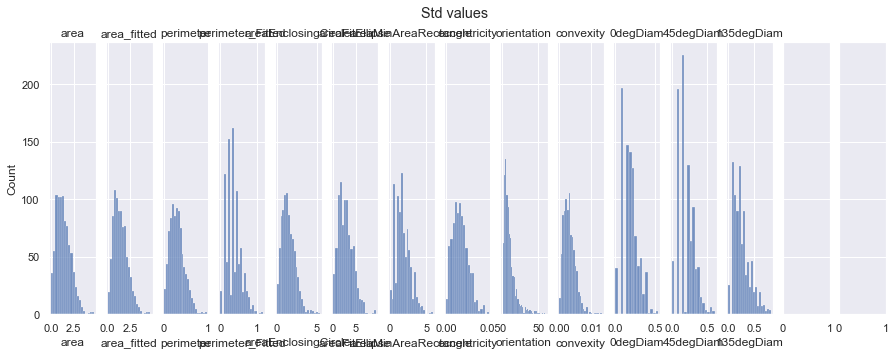

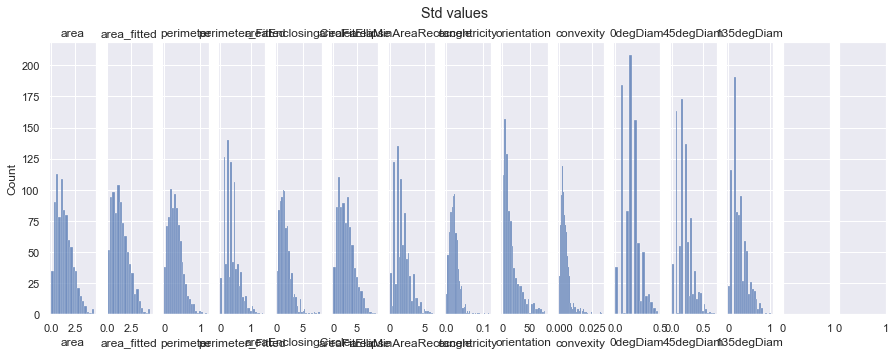

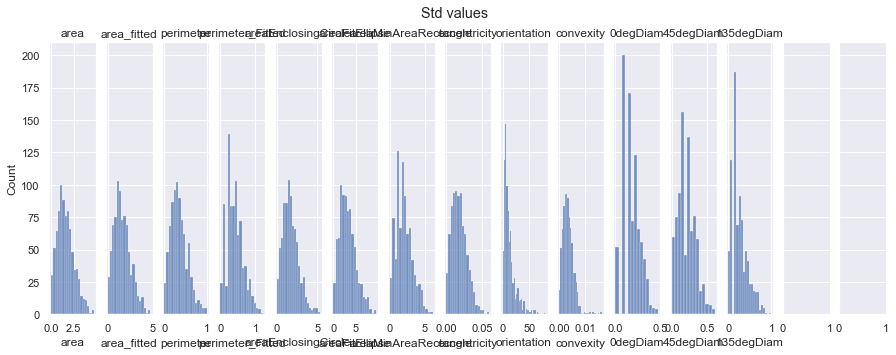

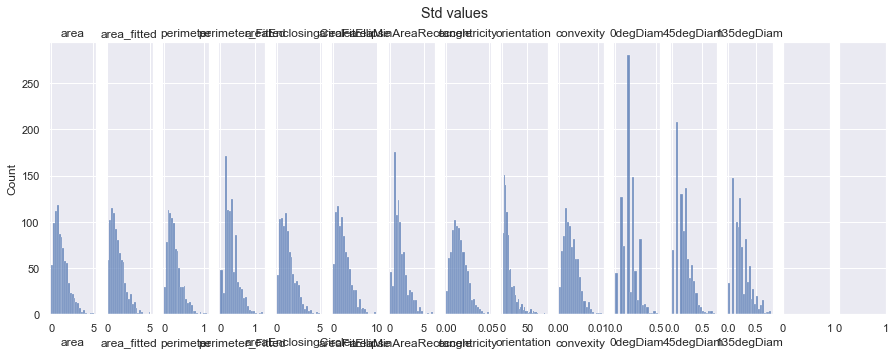

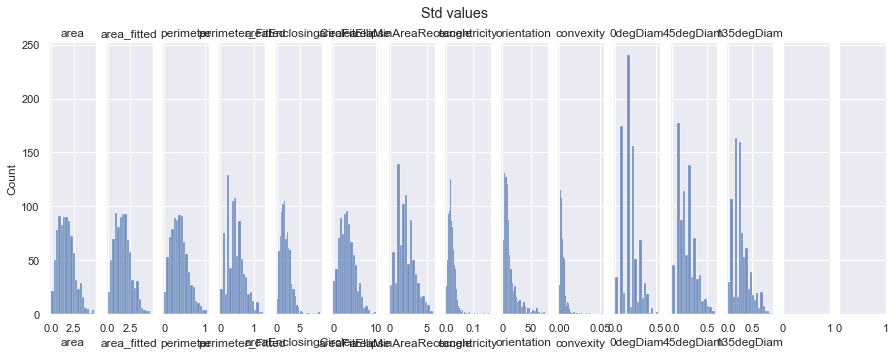

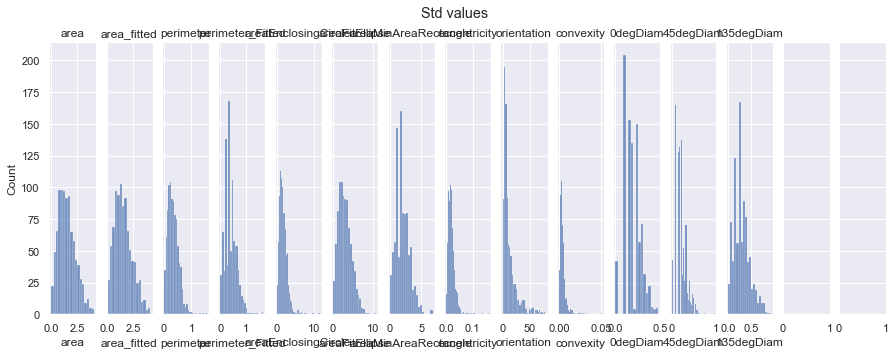

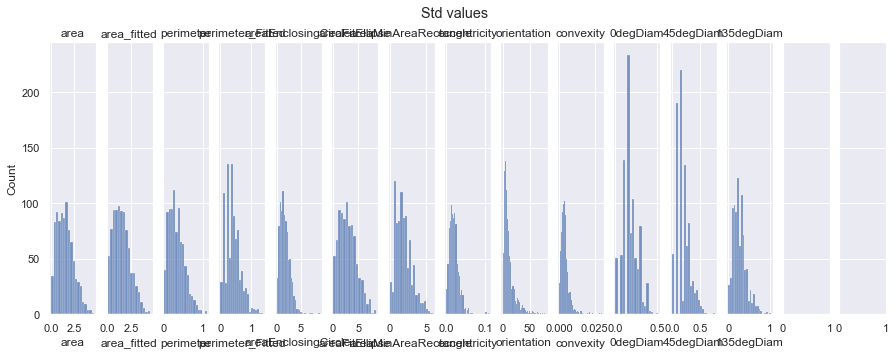

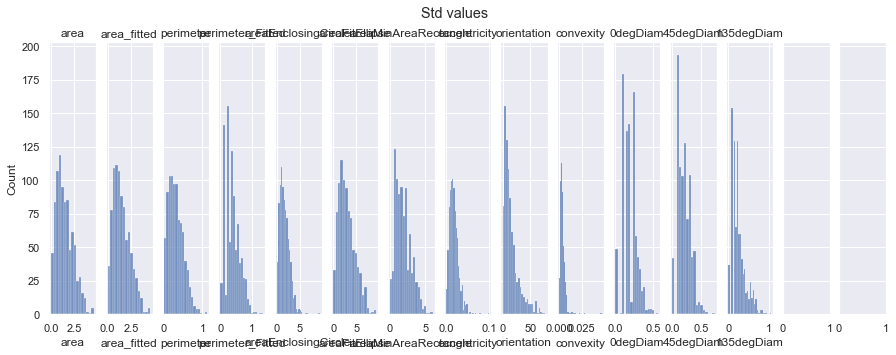

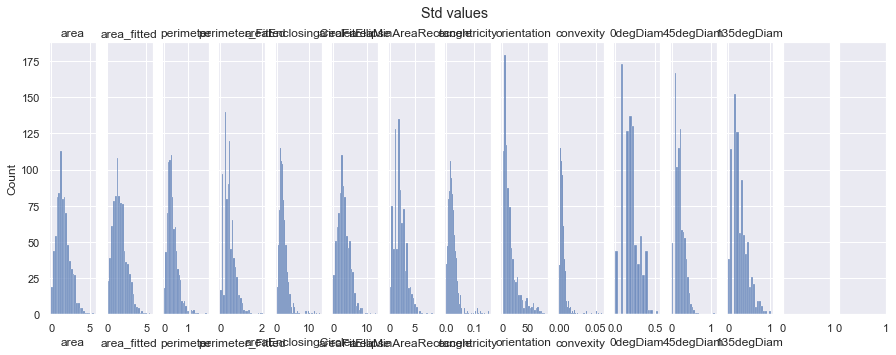

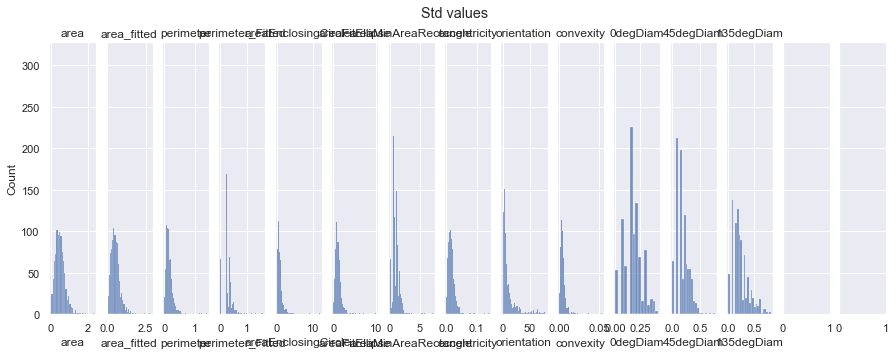

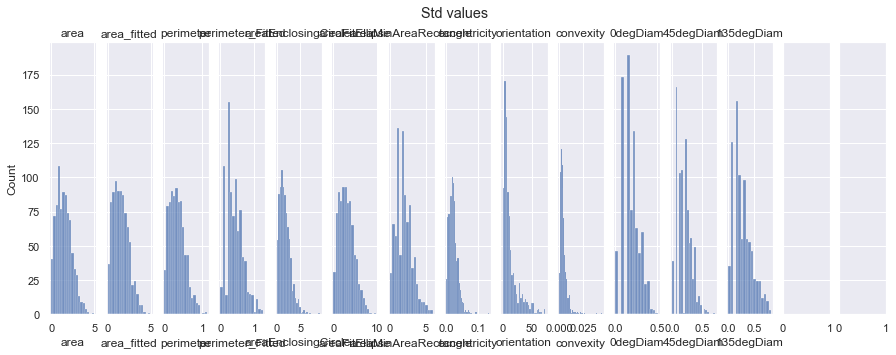

In [194]:
for k in range(0,len(std)):
    fig, axes = plt.subplots(1, len(std[k].columns), figsize=(15, 5), sharey=True)
    fig.suptitle('Std values')
    count=0
    for ft in mean[k].columns:
        if ft == "label" or ft == "90degDiam":
            continue
        sns.histplot(std[k][ft], ax=axes[count])
        axes[count].set_title(ft)
        count=count+1

<AxesSubplot:>

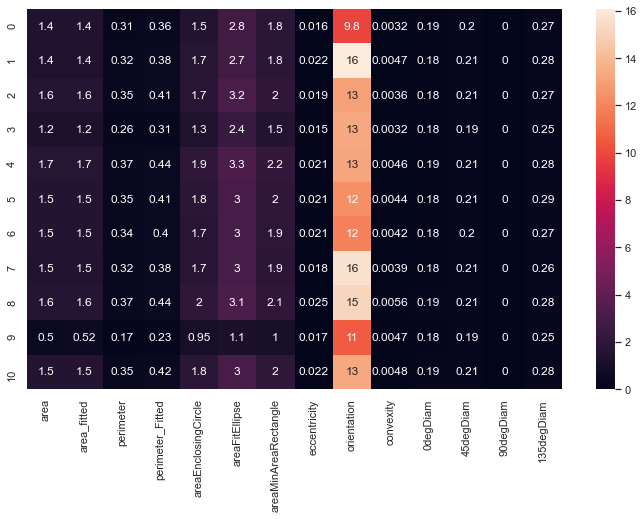

In [195]:
#Find average of each standard deviation column and display
avg_std=[]
ftx=[]
for ft in std[k].columns:
    if ft == "label":
        continue
    ftx.append(ft)
    
for k in range(0,len(std)):
    avg=[]
    for ft in std[k].columns:
        if ft == "label":
            continue
        mn = std[k][ft].mean()
        avg.append(mn)
    avg_std.append(avg)
    
df = pd.DataFrame(avg_std)
df.columns = ftx
fig, ax = plt.subplots(figsize = (12, 7)) 
sns.heatmap(df, annot = True)

## 2.0 Summary<a id='2.13_Summary'></a>

#######
Here we have loaded the wrangled data, cleaned up a little further, added appropriate column labels and calculated mean and standard deviation of the triplicate measurements. The average of the standard deviations of each features (pooled standard deviation) is then displayed as a heatmap. 

The heatmap shows that almost all the features have a low standard deviation but the linear features such as "*Diam i.e. diameter" exhibit very low standard deviation


#######
Comparing the average standard deviation for all the features between original data and enhanced data shows the data enhancement has a positive effect on the measurement as it reduces the standard deviation of the orientation of the structures.